# week4 授業前課題2 住宅価格の予想

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("train.csv")
index_array = df.columns
index_list = index_array.tolist()
index_list.remove("GrLivArea")
index_list.remove("YearBuilt")
index_list.remove("SalePrice")
df.drop(columns=index_list, inplace=True)
#df.columns
X = df.iloc[:, :2].values
y = df.iloc[:, 2:].values

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。<br>
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。<br>
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。<br>
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。<br>

In [3]:
# 分析
df.info()
# 欠損値はない

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
YearBuilt    1460 non-null int64
GrLivArea    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


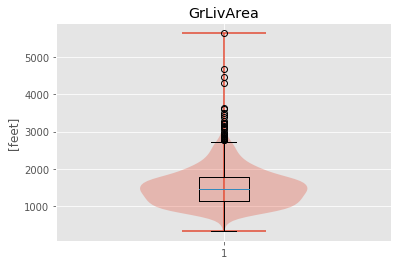

In [4]:
# 地上のリビングの広さ
plt.boxplot(df[:]["GrLivArea"])
plt.violinplot(df[:]["GrLivArea"])
plt.title("GrLivArea")
plt.ylabel("[feet]")
plt.show()
# 1000ft〜2000ftがボリュームゾーン 販売価格と比例しているように見える

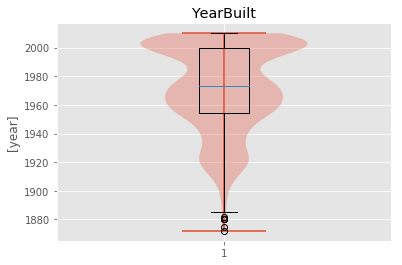

In [5]:
plt.boxplot(df[:]["YearBuilt"])
plt.violinplot(df[:]["YearBuilt"])
plt.title("YearBuilt")
plt.ylabel("[year]")
plt.show()
# 2000年前後の比較的新しい建物が１番多く、1970年前後も比較的多い

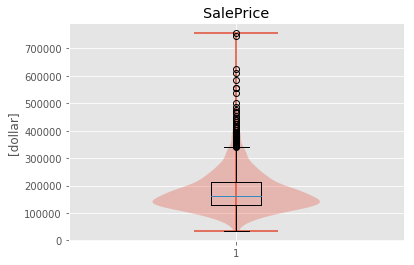

In [6]:
plt.boxplot(df[:]["SalePrice"])
plt.violinplot(df[:]["SalePrice"])
plt.title("SalePrice")
plt.ylabel("[dollar]")
plt.show()
# 10万〜20万ドルがボリュームゾーン高額な物もある

In [7]:
# 前処理
# 訓練データ75%、検証データ25%で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# 目的変数も標準化する
scaler.fit(y_train)
y_train_std = scaler.transform(y_train)
y_test_std = scaler.transform(y_test)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# 線形回帰で学習と推定
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_std, y_train_std)
y_pred_LinearRegression = reg.predict(X_test_std)

In [9]:
# 平均二乗誤差で評価
from sklearn.metrics import mean_squared_error
eval_LinearRegression = mean_squared_error(y_test_std, y_pred_LinearRegression)
eval_LinearRegression

0.4244232586104695

In [10]:
# 表作成用
pred_df = pd.DataFrame({"LinearRegression":[eval_LinearRegression]}, index=["平均二乗誤差"])

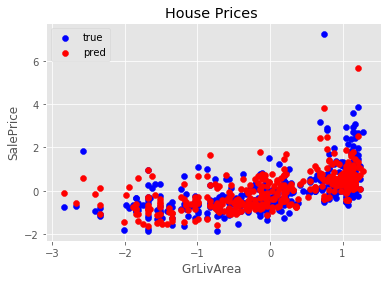

In [11]:
# scatterで可視化（）
x_1 = X_test_std[:, 0]   #GrLivArea y_true
x_2 = X_test_std[:, 0]   #GrLivArea y_pred

y_1 = y_test_std   #SalesPrice y_true
y_2 = y_pred_LinearRegression   #SalesPrice y_pred

# 散布図を描画
plt.title("House Prices ")
plt.xlabel("GrLivArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

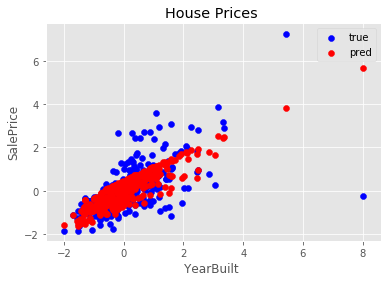

In [12]:
x_1 = X_test_std[:, 1]   #YearBuilt y_true
x_2 = X_test_std[:, 1]   #YearBuilt y_pred

y_1 = y_test_std   #SalePrice y_true
y_2 = y_pred_LinearRegression   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices ")
plt.xlabel("YearBuilt ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。<br>
- 3-1 線形回帰
- 3-2 SVM
- 3-3 決定木
- 3-4 ランダムフォレスト

そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。<br>
どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。<br>

### 3-1 線形回帰
問題2で対応済み

### 3-2 SVM

In [13]:
# 学習と推定
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train_std, y_train_std)
y_pred_svm = clf.predict(X_test_std)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# 平均二乗誤差で評価
eval_svm = mean_squared_error(y_test_std, y_pred_svm)
eval_svm

0.34193470965527495

In [15]:
# 表作成用
pred_df = pred_df.assign(SVM=[eval_svm])

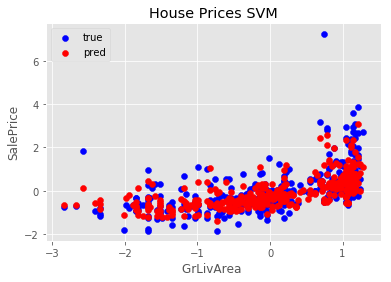

In [16]:
# scatterで可視化（）
x_1 = X_test_std[:, 0]   #GrLivArea y_true
x_2 = X_test_std[:, 0]   #GrLivArea y_pred

y_1 = y_test_std   #SalesPrice y_true
y_2 = y_pred_svm   #SalesPrice y_pred

# 散布図を描画
plt.title("House Prices SVM")
plt.xlabel("GrLivArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

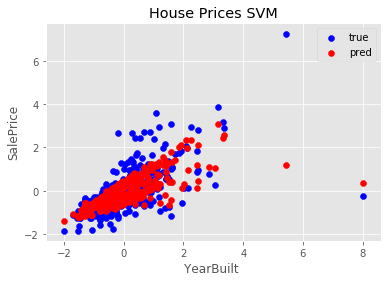

In [17]:
x_1 = X_test_std[:, 1]   #YearBuilt y_true
x_2 = X_test_std[:, 1]   #YearBuilt y_pred

y_1 = y_test_std   #SalePrice y_true
y_2 = y_pred_svm   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices SVM")
plt.xlabel("YearBuilt ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

### 3-3 決定木

In [18]:
# 学習と推定
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_std, y_train_std)
y_pred_regressor = regressor.predict(X_test_std)

In [19]:
# 平均二乗誤差で評価
eval_regressor = mean_squared_error(y_test_std, y_pred_regressor)
eval_regressor

0.45369922535538154

In [20]:
# 表作成用
pred_df = pred_df.assign(DecisionTree=[eval_regressor])

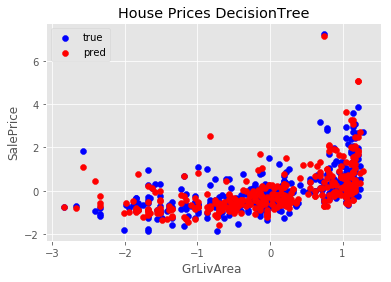

In [21]:
# scatterで可視化（）
x_1 = X_test_std[:, 0]   #GrLivArea y_true
x_2 = X_test_std[:, 0]   #GrLivArea y_pred

y_1 = y_test_std   #SalesPrice y_true
y_2 = y_pred_regressor   #SalesPrice y_pred

# 散布図を描画
plt.title("House Prices DecisionTree")
plt.xlabel("GrLivArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

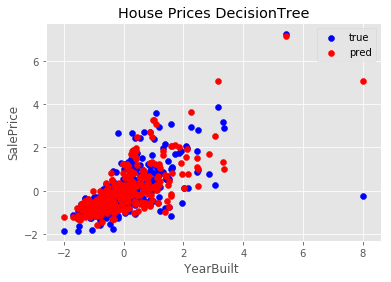

In [22]:
x_1 = X_test_std[:, 1]   #YearBuilt y_true
x_2 = X_test_std[:, 1]   #YearBuilt y_pred

y_1 = y_test_std   #SalePrice y_true
y_2 = y_pred_regressor   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices DecisionTree")
plt.xlabel("YearBuilt ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

### 3-4 ランダムフォレスト

In [23]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train_std, y_train_std)
y_pred_randomF = regr.predict(X_test_std)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# 平均二乗誤差で評価
eval_randomF= mean_squared_error(y_test_std, y_pred_randomF)
eval_randomF

0.30530569640336275

In [25]:
# 表作成用
pred_df = pred_df.assign(RandomForest=[eval_randomF])

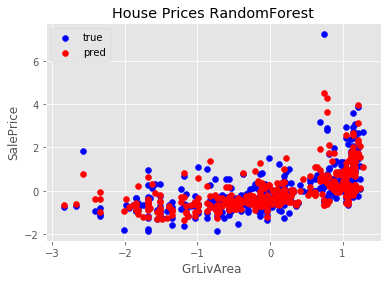

In [26]:
# scatterで可視化（）
x_1 = X_test_std[:, 0]   #GrLivArea y_true
x_2 = X_test_std[:, 0]   #GrLivArea y_pred

y_1 = y_test_std   #SalesPrice y_true
y_2 = y_pred_randomF   #SalesPrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("GrLivArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

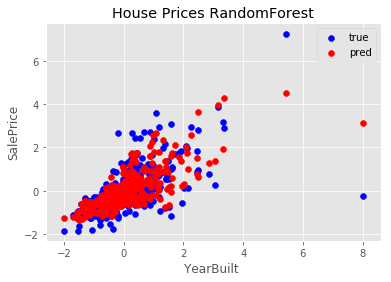

In [27]:
x_1 = X_test_std[:, 1]   #YearBuilt y_true
x_2 = X_test_std[:, 1]   #YearBuilt y_pred

y_1 = y_test_std   #SalePrice y_true
y_2 = y_pred_randomF   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("YearBuilt ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

In [28]:
# 表を表示
pred_df

,LinearRegression,SVM,DecisionTree,RandomForest
平均二乗誤差,0.424423,0.341935,0.453699,0.305306


### 考察
複数回学習データを変えて検証したところ、ランダムフォレストの予測の精度が１番高い（平均二乗誤差は小さいほど精度が高い）<br>
線形回帰、SVMはYearBildとの散布図をみると、どちらも線形に固まってしまい、上手く予測ができていないように感じるが<br>
決定木は予測精度が低く、学習データによっては、指標値が0.6近くになることもあった

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
week3で選んだ特徴量10個から相関関係の高かった下記から片方づつと、相関係数がSalePriceと最も高かったOverallQual（全体的な品質）を追加して検証する<br>
GarageAreaとGarageCars（ガレージのサイズ：ガレージに車が何台入るか）
TotRmsAbvGrdとGrLivArea（部屋の数：リビング（地上）の広さ）
TotalBsmtSFと1stFlrSF（地下室の広さ：1階の広さ）

GarageArea、GrLivArea、TotalBsmtSF
OverallQual、YearBuilt

In [29]:

df_a = pd.read_csv("train.csv")
index_array = df_a.columns
index_list = index_array.tolist()
index_list.remove("GrLivArea")
index_list.remove("YearBuilt")
index_list.remove("TotalBsmtSF")
index_list.remove("GarageArea")
index_list.remove("OverallQual")
index_list.remove("SalePrice")
df_a.drop(columns=index_list, inplace=True)
#欠損値なし
print(df_a.info())
X_a = df_a.iloc[:, :-1].values
y_a = df_a.iloc[:, -1:].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
OverallQual    1460 non-null int64
YearBuilt      1460 non-null int64
TotalBsmtSF    1460 non-null int64
GrLivArea      1460 non-null int64
GarageArea     1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(6)
memory usage: 68.5 KB
None


In [30]:
X_a

array([[   7, 2003,  856, 1710,  548],
       [   6, 1976, 1262, 1262,  460],
       [   7, 2001,  920, 1786,  608],
       ...,
       [   7, 1941, 1152, 2340,  252],
       [   5, 1950, 1078, 1078,  240],
       [   5, 1965, 1256, 1256,  276]])

In [31]:
# 前処理
# 訓練データ75%、検証データ25%で分割
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.25)
# 標準化
scaler_x = StandardScaler()
scaler_x.fit(X_train_a)
X_train_std_a = scaler_x.transform(X_train_a)
X_test_std_a = scaler_x.transform(X_test_a)
# 目的変数も標準化する
scaler_y = StandardScaler()
scaler_y.fit(y_train_a)
y_train_std_a = scaler_y.transform(y_train_a)
y_test_std_a = scaler_y.transform(y_test_a)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
# 線形回帰で学習と推定
reg = LinearRegression().fit(X_train_std_a, y_train_std_a)
y_pred_LinearRegression_a = reg.predict(X_test_std_a)

In [33]:
# 平均二乗誤差で評価
eval_LinearRegression_a = mean_squared_error(y_test_std_a, y_pred_LinearRegression_a)
eval_LinearRegression_a

0.1557396165970894

In [34]:
# SVM
clf = SVR()
clf.fit(X_train_std_a, y_train_std_a)
y_pred_svm_a = clf.predict(X_test_std_a)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# 平均二乗誤差で評価
eval_svm_a = mean_squared_error(y_test_std_a, y_pred_svm_a)
eval_svm_a

0.11770738188214655

In [36]:
# 決定木
regressor = DecisionTreeRegressor()
regressor.fit(X_train_std_a, y_train_std_a)
y_pred_regressor_a = regressor.predict(X_test_std_a)

In [37]:
# 平均二乗誤差で評価
eval_regressor_a = mean_squared_error(y_test_std_a, y_pred_regressor_a)
eval_regressor_a

0.22936160096976482

In [38]:
# ランダムフォレスト
regr = RandomForestRegressor()
regr.fit(X_train_std_a, y_train_std_a)
y_pred_randomF_a = regr.predict(X_test_std_a)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# 平均二乗誤差で評価
eval_randomF_a= mean_squared_error(y_test_std_a, y_pred_randomF_a)
eval_randomF_a

0.14903705340459072

### 予測精度が高かったランダムフォレストを可視化

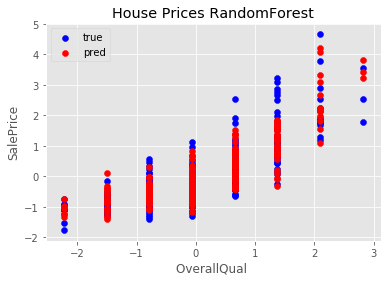

In [40]:

x_1 = X_test_std_a[:, 0]   #OverallQual y_true
x_2 = X_test_std_a[:, 0]   #OverallQual y_pred
y_1 = y_test_std_a   #SalePrice y_true
y_2 = y_pred_randomF_a   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("OverallQual ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

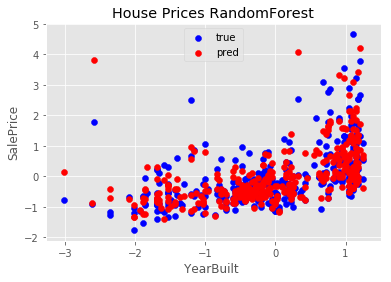

In [41]:
x_1 = X_test_std_a[:, 1]   #YearBuilt y_true
x_2 = X_test_std_a[:, 1]   #YearBuilt y_pred
y_1 = y_test_std_a   #SalePrice y_true
y_2 = y_pred_randomF_a   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("YearBuilt ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

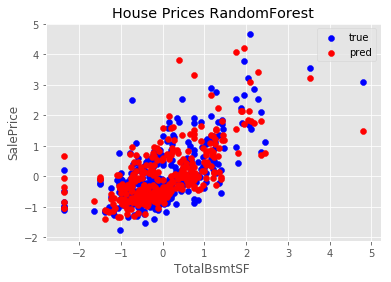

In [42]:
x_1 = X_test_std_a[:, 2]   #TotalBsmtSF y_true
x_2 = X_test_std_a[:, 2]   #TotalBsmtSF y_pred
y_1 = y_test_std_a   #SalePrice y_true
y_2 = y_pred_randomF_a   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("TotalBsmtSF ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

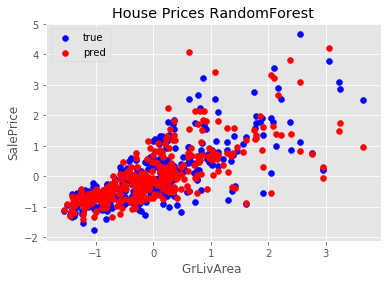

In [43]:
x_1 = X_test_std_a[:, 3]   #TotalBsmtSF y_true
x_2 = X_test_std_a[:, 3]   #TotalBsmtSF y_pred
y_1 = y_test_std_a   #SalePrice y_true
y_2 = y_pred_randomF_a   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("GrLivArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

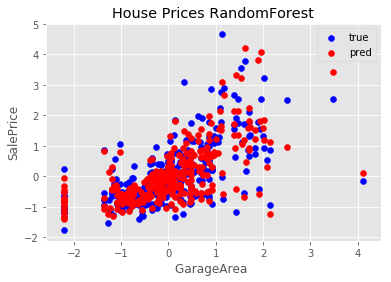

In [44]:
x_1 = X_test_std_a[:, 4]   #TotalBsmtSF y_true
x_2 = X_test_std_a[:, 4]   #TotalBsmtSF y_pred
y_1 = y_test_std_a   #SalePrice y_true
y_2 = y_pred_randomF_a   #SalePrice y_pred

# 散布図を描画
plt.title("House Prices RandomForest")
plt.xlabel("GarageArea ")
plt.ylabel("SalePrice")
plt.scatter(x_1, y_1, c="b", label="true")
plt.scatter(x_2, y_2, c="r", label="pred")
plt.legend()
plt.show()

### 考察
相関の高そうなを3つの特徴量を加えることによって、SVMとランダムフォレストの２つで二乗平均誤差を　0.11~0.16にまで下げることができた

### おまけ
スケールを元に戻して、予測と実際の価格をグラフにする

In [45]:
p_y = scaler_y.inverse_transform(y_pred_randomF_a)
t_y = scaler_y.inverse_transform(y_test_std_a)

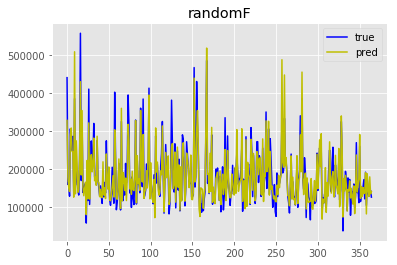

In [46]:
plt.plot(t_y,color="b", label="true")
plt.plot(p_y,color = "y", label="pred")
plt.title("randomF")
plt.legend()
plt.show()

In [47]:
p_y = scaler_y.inverse_transform(y_pred_svm_a)
t_y = scaler_y.inverse_transform(y_test_std_a)

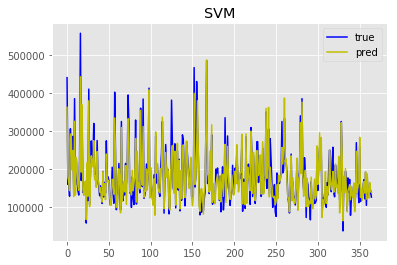

In [48]:
plt.plot(t_y,color="b", label="true")
plt.plot(p_y,color = "y", label="pred")
plt.title("SVM")
plt.legend()
plt.show()